In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


df = pd.read_csv('movie.csv')  
df.info()
df=df.drop_duplicates()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Viv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 39723 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39723 non-null  object
 1   label   39723 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 931.0+ KB
None
label
1    19908
0    19815
Name: count, dtype: int64


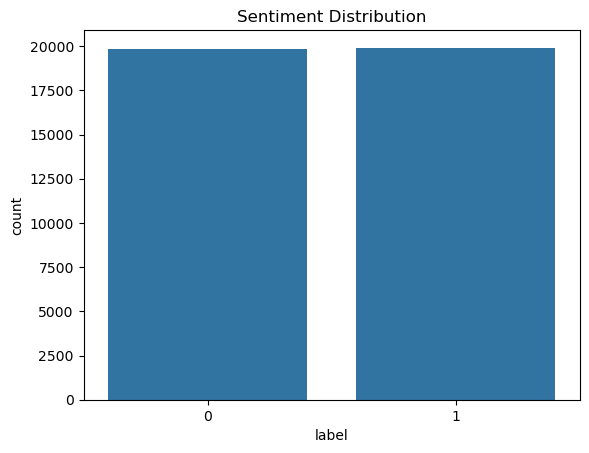

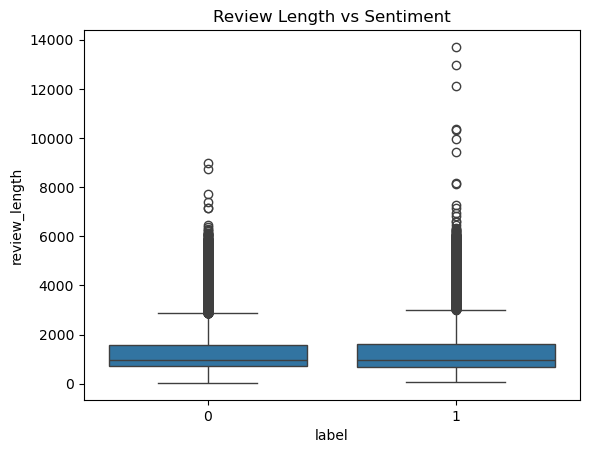

In [12]:
# Basic info
print(df.info())
print(df['label'].value_counts())

# Review length
df['review_length'] = df['text'].apply(len)

# Visualize
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.show()

sns.boxplot(x='label', y='review_length', data=df)
plt.title("Review Length vs Sentiment")
plt.show()


In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)


df['cleaned_text'] = df['text'].apply(clean_text)


In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['cleaned_text'].apply(lemmatize_text)


In [15]:
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [17]:
## Step 6: Vectorizer Comparison

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Vectorizers to compare
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TF-IDF": TfidfVectorizer(),
    "Binary (One-Hot)": CountVectorizer(binary=True)
}

results = []

for name, vectorizer in vectorizers.items():
    print(f"\nUsing Vectorizer: {name}")
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model = LogisticRegression(max_iter=300)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    y_proba = model.predict_proba(X_test_vec)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc:.4f}")
    results.append((name, acc, f1, roc))

# Summary table
print("\n--- Vectorizer Performance Summary ---")
for name, acc, f1, roc in results:
    print(f"{name:<20} | Accuracy: {acc:.4f} | F1 Score: {f1:.4f} | ROC-AUC: {roc:.4f}")



Using Vectorizer: CountVectorizer
Accuracy: 0.8746, F1 Score: 0.8747, ROC-AUC: 0.9401

Using Vectorizer: TF-IDF
Accuracy: 0.8840, F1 Score: 0.8851, ROC-AUC: 0.9537

Using Vectorizer: Binary (One-Hot)
Accuracy: 0.8715, F1 Score: 0.8720, ROC-AUC: 0.9421

--- Vectorizer Performance Summary ---
CountVectorizer      | Accuracy: 0.8746 | F1 Score: 0.8747 | ROC-AUC: 0.9401
TF-IDF               | Accuracy: 0.8840 | F1 Score: 0.8851 | ROC-AUC: 0.9537
Binary (One-Hot)     | Accuracy: 0.8715 | F1 Score: 0.8720 | ROC-AUC: 0.9421


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.871491504090623
F1 Score: 0.871974921630094
ROC-AUC: 0.9420691370961496
Confusion Matrix:
 [[3447  544]
 [ 477 3477]]
